# 🧿 Octonionic Convergence Protocol

This notebook explores recursive dynamics through octonionic multiplication to simulate φ⁰ emergence patterns.

Inspired by the Updated Salgado Matrix, each octonion basis (e₀ to e₇) is symbolically aligned with a sigil position:

- `e₀` → Base identity  
- `e₁` → Awakening (◇)  
- `e₂` → Collapse (▲)  
- `e₃` → Structure (◻️)  
- `e₄` → Inversion (▼)  
- `e₅` → Field overlay (◼️)  
- `e₆` → Final attractor (🟧)  
- `e₇` → Observer / anomaly axis  

Recursive loops test how symbolic recursion stabilizes or diverges over time.


In [28]:
import numpy as np

# Placeholder multiplication table for demonstration purposes
def octonion_mult(a, b):
    """
    Perform octonion multiplication on two 8D numpy arrays a and b.
    Indices 0 to 7 represent e0 to e7.
    """
    c = np.zeros(8)
    # Scalar part
    c[0] = a[0]*b[0] - np.dot(a[1:], b[1:])
    
    # Vector part using Fano plane multiplication rules
    fano = [
        (1, 2, 3), (1, 4, 5), (1, 7, 6),
        (2, 4, 6), (2, 5, 7), (3, 4, 7),
        (3, 5, 6)
    ]
    
    for i in range(1, 8):
        c[i] += a[0]*b[i] + a[i]*b[0]
    
    for (i, j, k) in fano:
        c[i] += a[j]*b[k] - a[k]*b[j]
        c[j] += a[k]*b[i] - a[i]*b[k]
        c[k] += a[i]*b[j] - a[j]*b[i]
    
    return c

In [29]:
# Reset
history_linear = []
history_exp = []
history_log = []

# Initial state
psi_0 = np.array([0.5, 0.2, -0.3, 0.1, 0.4, -0.2, 0.6, 0.05])

# Linear recursion
psi = psi_0.copy()
for _ in range(100):
    psi = octonion_mult(psi, psi_0)
    history_linear.append(psi.copy())

# Exponential scaling
psi = psi_0.copy()
for i in range(100):
    scale = np.exp(i * 0.01)
    psi = octonion_mult(psi, psi_0 * scale)
    history_exp.append(psi.copy())

# Logarithmic damping
psi = psi_0.copy()
for i in range(1, 101):
    scale = 1 / np.log(i + 1)
    psi = octonion_mult(psi, psi_0 * scale)
    history_log.append(psi.copy())

# Convert all to arrays (after appending real vectors!)
history_linear = np.array(history_linear)
history_exp = np.array(history_exp)
history_log = np.array(history_log)


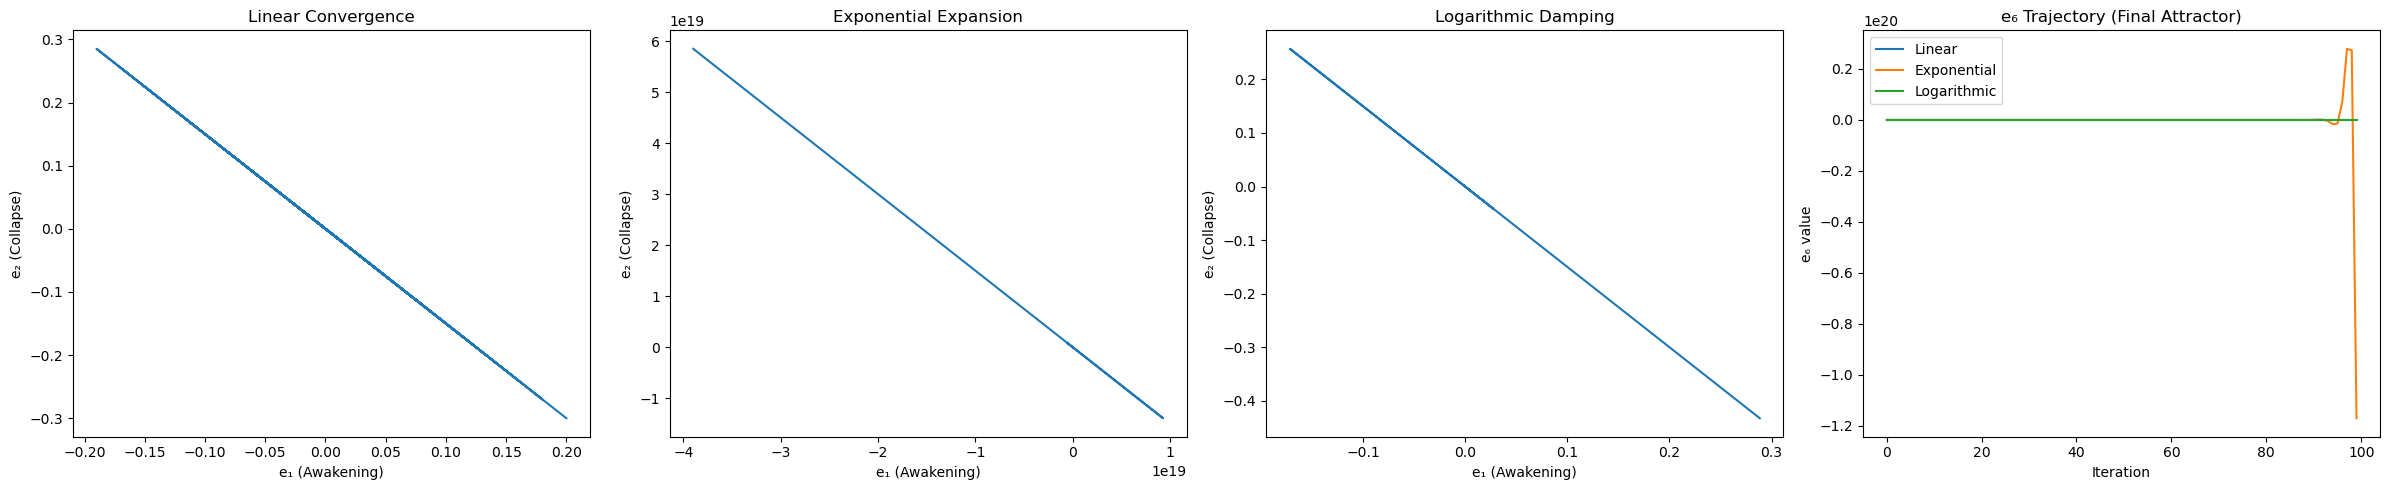

In [30]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 4, figsize=(24, 5))

# e₁ vs e₂ plots
axs[0].plot(history_linear[:,1], history_linear[:,2])
axs[0].set_title("Linear Convergence")
axs[0].set_xlabel("e₁ (Awakening)")
axs[0].set_ylabel("e₂ (Collapse)")

axs[1].plot(history_exp[:,1], history_exp[:,2])
axs[1].set_title("Exponential Expansion")
axs[1].set_xlabel("e₁ (Awakening)")
axs[1].set_ylabel("e₂ (Collapse)")

axs[2].plot(history_log[:,1], history_log[:,2])
axs[2].set_title("Logarithmic Damping")
axs[2].set_xlabel("e₁ (Awakening)")
axs[2].set_ylabel("e₂ (Collapse)")

# e₆ (Final Attractor) vs iteration
axs[3].plot(range(100), history_linear[:,6], label='Linear')
axs[3].plot(range(100), history_exp[:,6], label='Exponential')
axs[3].plot(range(100), history_log[:,6], label='Logarithmic')
axs[3].set_title("e₆ Trajectory (Final Attractor)")
axs[3].set_xlabel("Iteration")
axs[3].set_ylabel("e₆ value")
axs[3].legend()

plt.tight_layout()
plt.show()


### 🔍 Observations
This visualization explores how recursive octonion products simulate symbolic evolution under different scaling regimes, specifically tracking convergence toward the symbolic attractor axis e₆ (🟧 Emergent Harmonic).

Summary of Behaviors:
| Mode            | (e₁ vs e₂) Dynamics             | `e₆` (Final Attractor) Behavior       | Interpretation                 |
| --------------- | ------------------------------- | ------------------------------------- | ------------------------------ |
| **Linear**      | Smooth diagonal path            | Constant `e₆` value (stable)          | Coherent symbolic recursion    |
| **Exponential** | Explosive growth (\~10¹⁹ range) | Diverges to \~−10²⁰ after oscillation | Feedback overload / breakdown  |
| **Logarithmic** | Damped motion with decay        | Flat, stable `e₆` trajectory          | Harmonic convergence toward φ⁰ |

